In [4]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Make DataFrame column view wider
pd.set_option('display.max_colwidth', 200)
#Read file
df = pd.read_csv('F:\Car_Price_Predictions\data\CarPrice_Assignment.csv')

In [6]:
#Drop Car_ID
df.drop('car_ID', axis=1, inplace=True)

In [7]:
#Get Car Name
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
#Change Typo Car Name
df.replace({'CarName':{'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'}}, inplace=True)
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

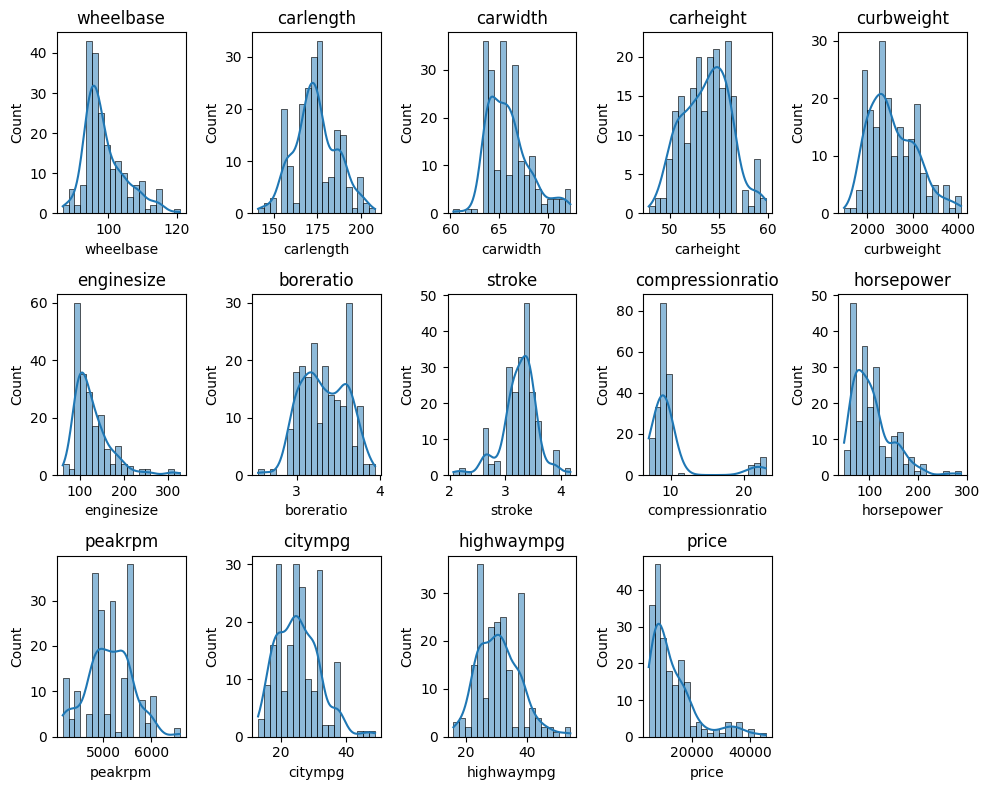

In [9]:
#Numerical Data Distribution
numCol = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
          'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(10, 8))
for features in numCol:
    plt.subplot(3, 5, numCol.index(features) + 1)
    sns.histplot(data=df[features], bins=20, kde=True)
    plt.title(features)
plt.tight_layout()
plt.show()

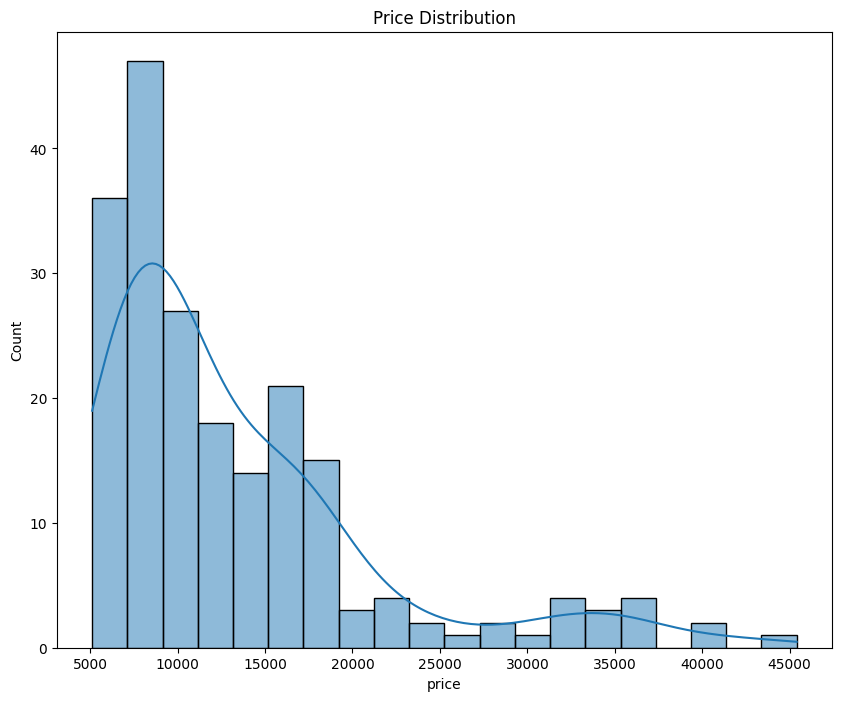

In [10]:
#Price Distribution
plt.figure(figsize=(10, 8))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.show()

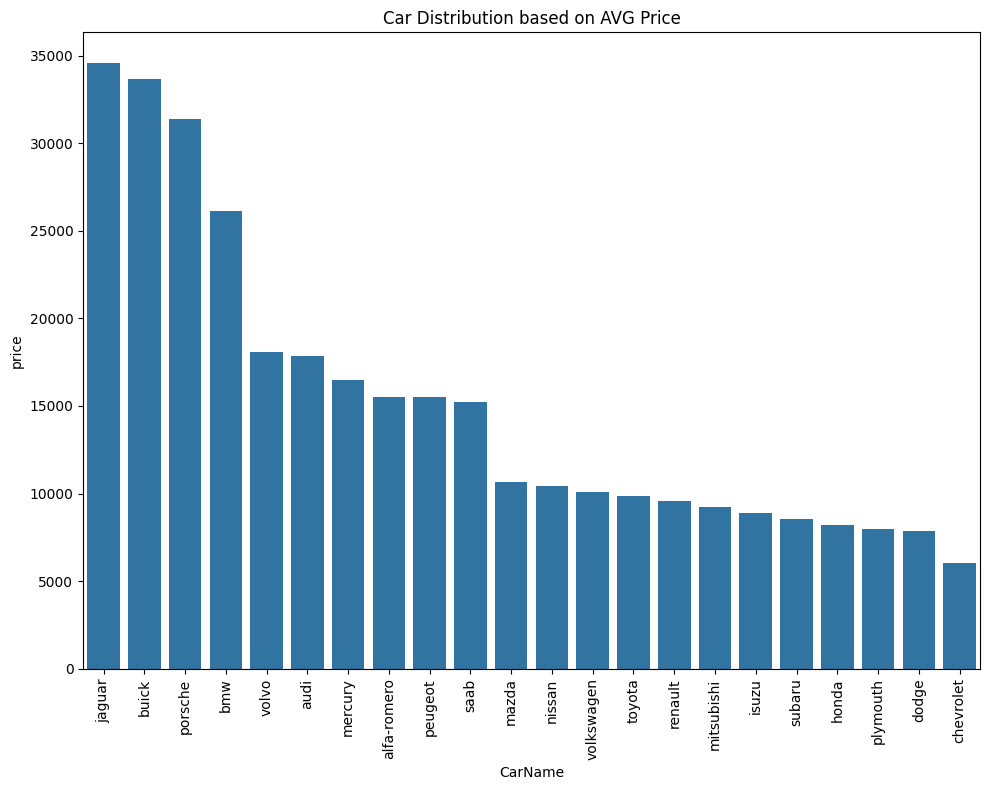

In [11]:
#Car Distribution based on AVG Price
avg_carPrice = df.groupby('CarName')['price'].mean().reset_index()
avg_carPrice = avg_carPrice.sort_values(by='price', ascending=False)#sort by values

plt.figure(figsize=(10, 8))
sns.barplot(data=avg_carPrice, x='CarName', y='price')
plt.xticks(rotation=90)
plt.title('Car Distribution based on AVG Price')
plt.tight_layout()
plt.show()

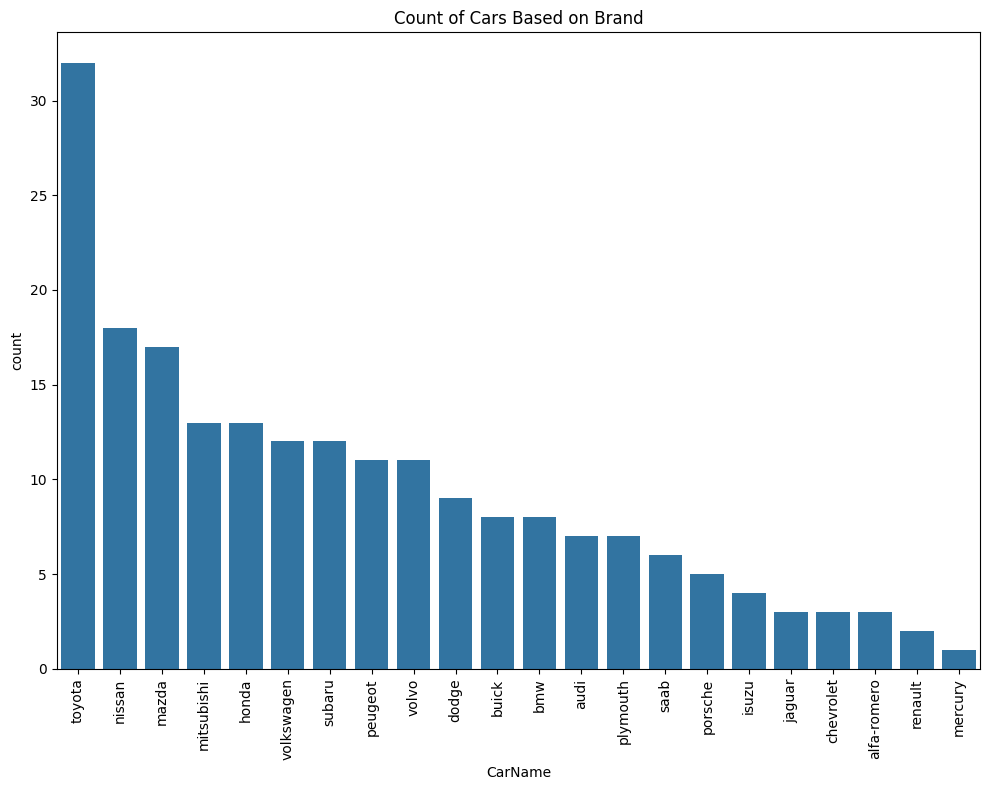

In [12]:
#Count Car Based on Brand
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='CarName', order=df['CarName'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Cars Based on Brand')
plt.tight_layout()
plt.show()

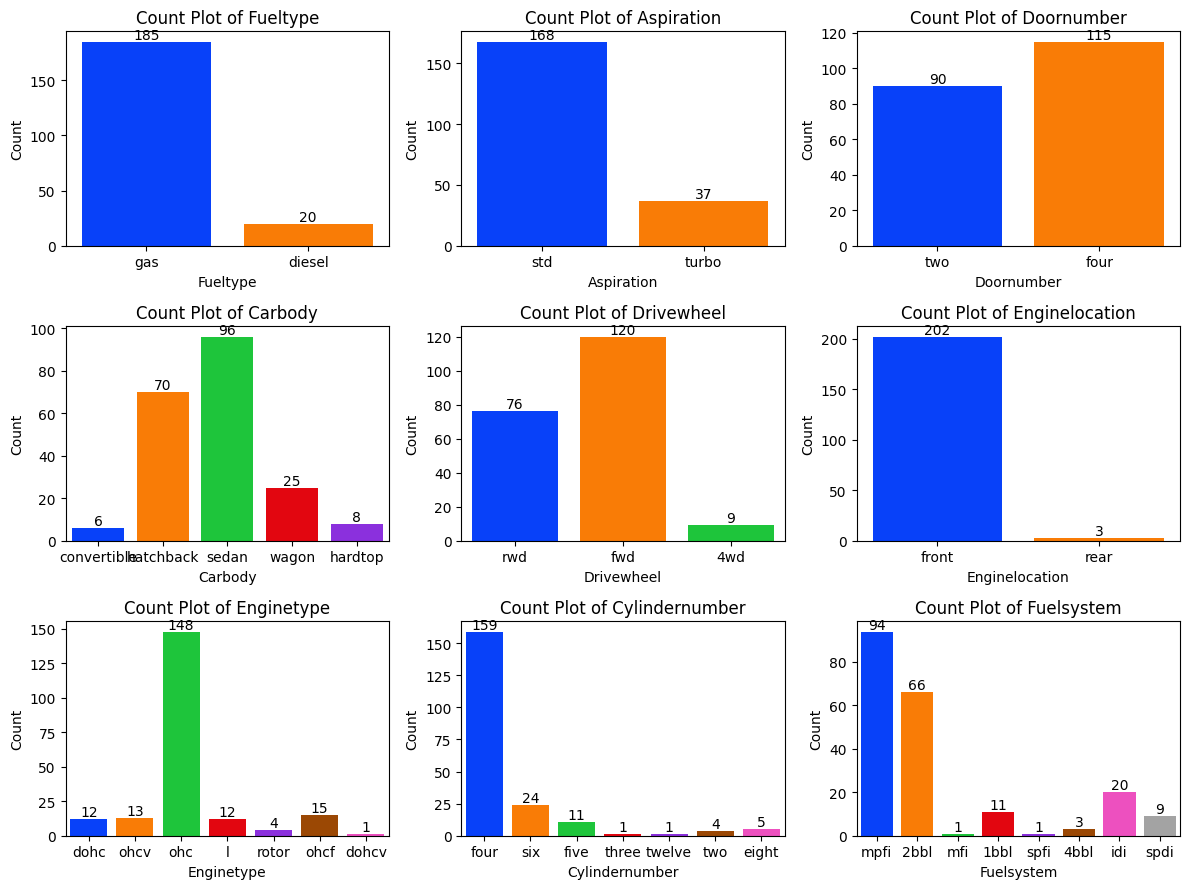

In [13]:
#Count Categorical Columns
catCol = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
          'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(catCol):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

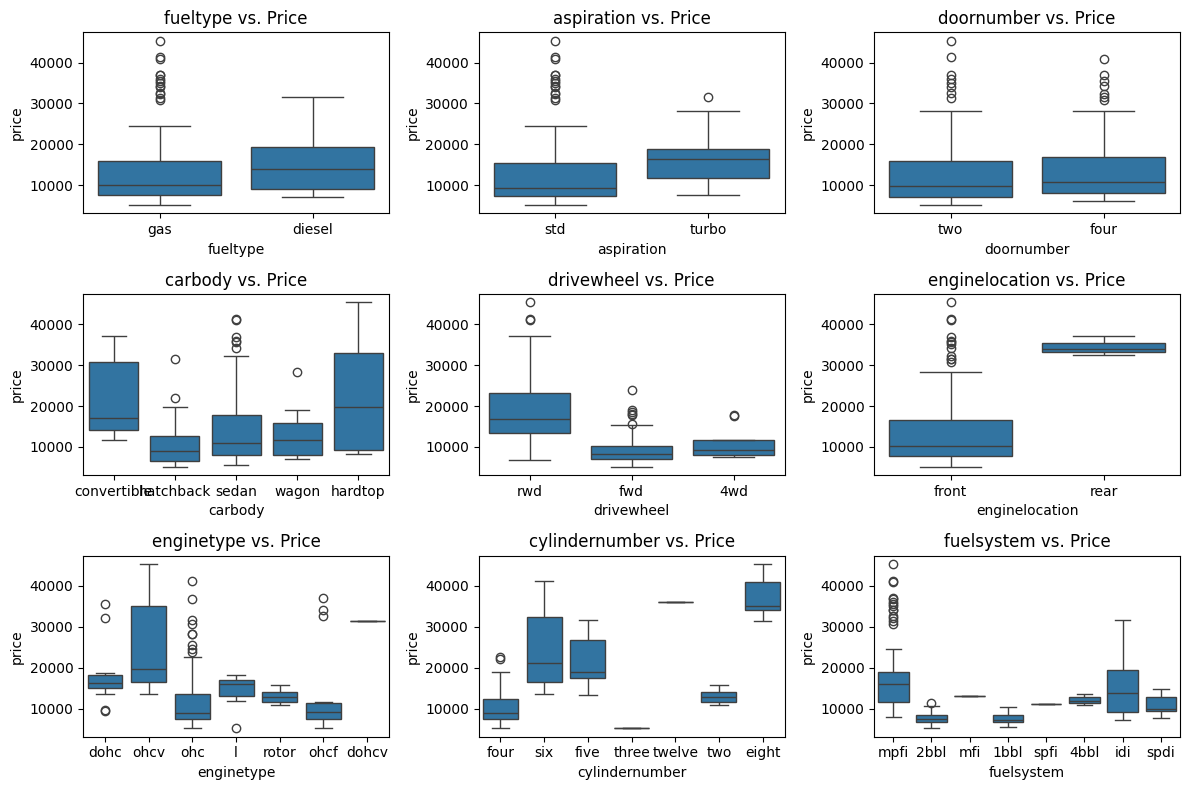

In [14]:
plt.figure(figsize=(12, 8))
for features in catCol:
    plt.subplot(3, 3, catCol.index(features) + 1)
    sns.boxplot(data=df, x=features, y='price')
    plt.title(f'{features} vs. Price')
plt.tight_layout()
plt.show()

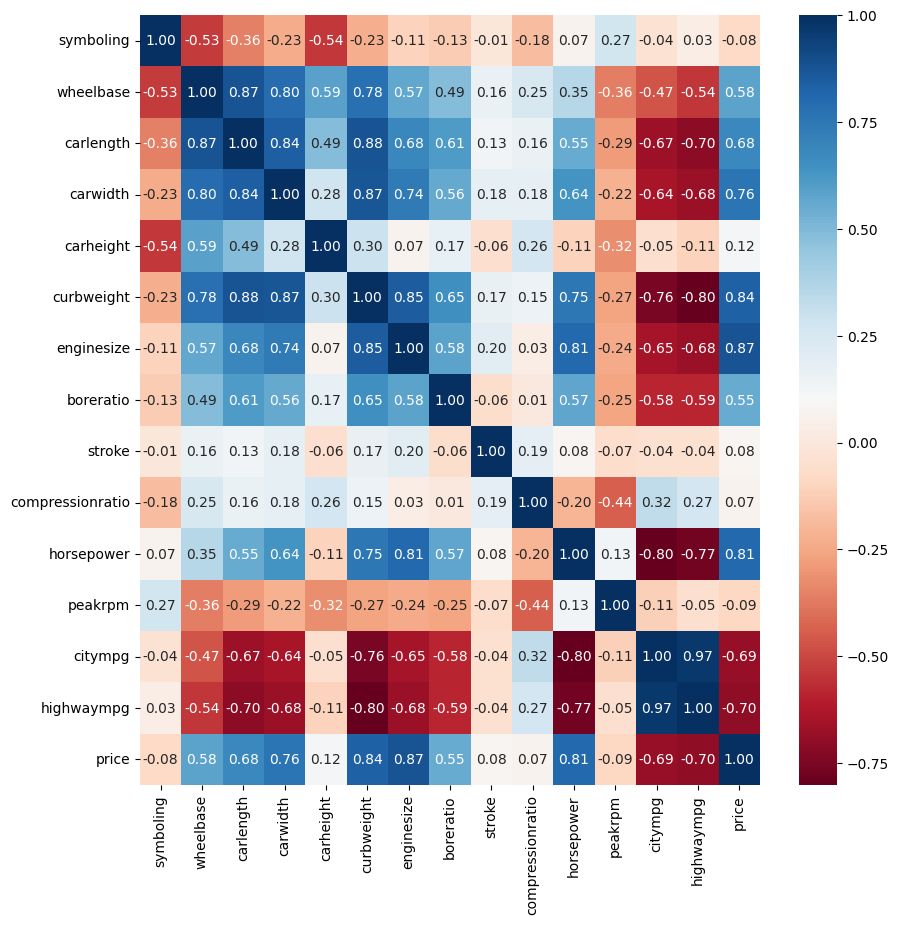

In [15]:
#Data Correlation
dfCorr=['symboling','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
          'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_corr = df[dfCorr].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(data=df_corr, annot=True, fmt=".2f", cmap='RdBu')
plt.show()

In [ ]:
#Correlation with Price
df_corr[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


In the correlation matrix, we can see more evidence that some physiological features are strongly related to specific penguin species. Look at the correlation values that are less than -0.6 or more than 0.6:
* EngineSize
* Curbweight
* HorsePower
* CarWidth
* CarLength
* CityMpg -> berkolerasi negatif
* Highwaympg -> berkolerasi negatif